# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1660]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#from scipy. stats import pearsonr 
#import matplotlib.pyplot as plt 


try:
    real_estate_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    real_estate_df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.options.display.max_columns = None

Выведy основную информацию о датафрейме с помощью метода info()

In [1661]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведy первые 5 строчек датафрейма data на экран

In [1662]:
real_estate_df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Согласно исходным данным, в таблице содержатся следующие названия столбцов:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В столбцах `cityCenters_nearest`, `ponds_around3000`, `parks_around3000` нарушен стиль. Все названия столбцов начинаются с маленькой буквы, а пробелы между словами заменены нижним подчеркиванием. Это необходимо исправить. 

In [1663]:
real_estate_df = real_estate_df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                                                'parks_around3000':'parks_around_3000', 
                                                'ponds_around3000':'ponds_around_3000'})

**Построю гистрограмму для всех числовых типов данных датафрейма**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

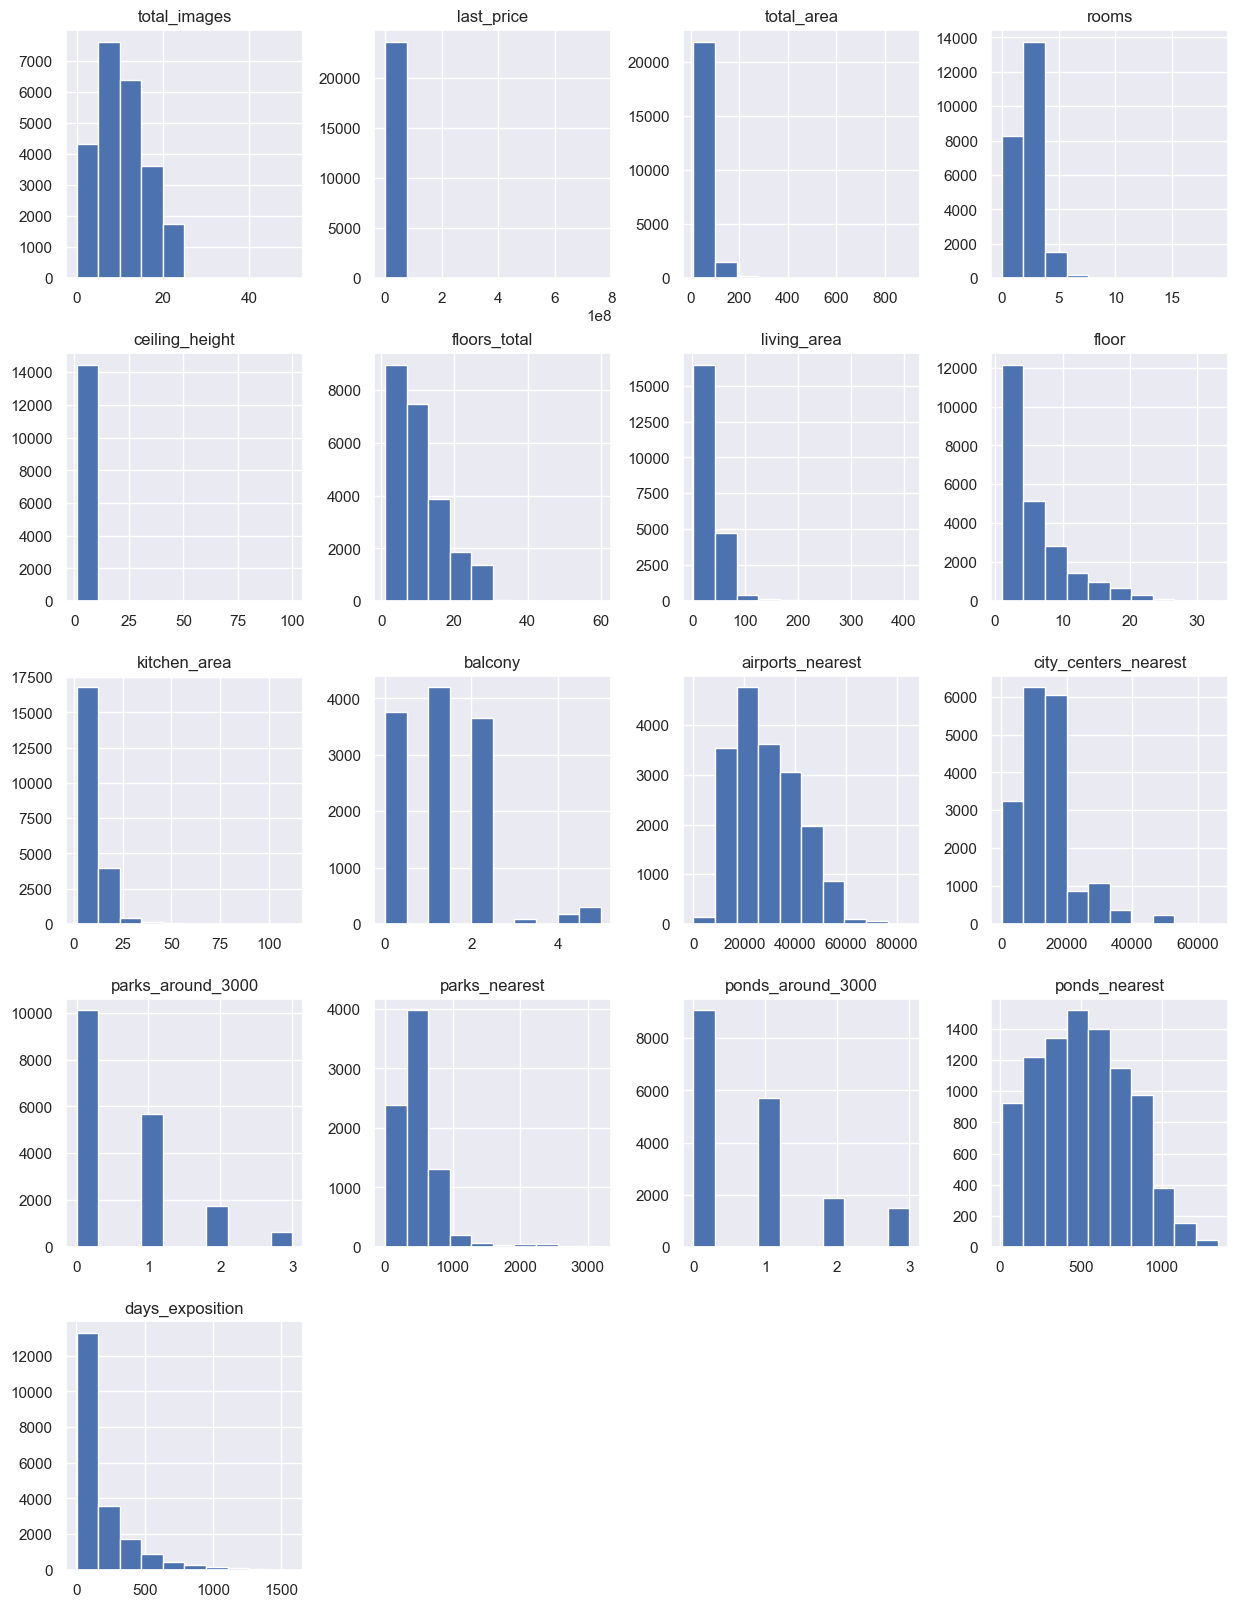

In [1664]:
real_estate_df.hist(figsize=(15, 20))

### Вывод: 
В датафрейме содержится информация о квартире, выставленной на продажу в городе Санкт-Петербург и его области. Всего в датасете информация о 23699 квартирах. 
Первичные гистограммы говорят о том, что необходимо почистить данные, убрать выбросы и сделать больше корзин для некоторых столбцов. 

### Предобработка данных

В предобратке данных необходимо сделать следующее: 
1. Проверить наличие пропусков. Там, где возможность есть, от пропусков избавиться 
2. Изменить типы данных, если в этом есть необходимость
3. Проверить наличие дубликатов. Избваиться от дубликатов
4. Найти и устранить редкие выбивающиеся значения

Проверим наличие дубликатов

In [1665]:
print(f'Количество явных дубликатов: {real_estate_df.duplicated().sum()}')

Количество явных дубликатов: 0


Отлично, в данных нет явных дубликатов. Неявные обработаем чуть позже. 

Так как в наших данных нет дубликатов - у нас есть информация о  23699 квартирах

Проверю наличие пропусков в столбце 

In [1666]:
real_estate_df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Для удобтсва и понимания выведу их в процентах

In [1667]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100
real_estate_df['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

В следующих столбцах есть пропуски:
* `ceiling_height`
* `living_area`
* `is_apartment`
* `kitchen_area`
* `balcony`
* `locality_name`
* `airports_nearest`
* `city_centers_nearest`
* `parks_nearest`
* `ponds_around_3000`
* `parks_around_3000`
* `ponds_nearest`
* `days_exposition` 

Процент пропущенных в `floors_total` очень невелик, поэтому эти данные можно удалить

In [1668]:
real_estate_df.dropna(subset=['floors_total'], inplace=True)

In [1669]:
real_estate_df['floors_total'].isna().sum()

0

Посмотрю описание столбца `ceiling_height` 

In [1670]:
real_estate_df['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение высоты потолков - 2.65м, а среднее - 2.77м. Так как среднее более восприимчиво к выбросам - пропуски заполню медианным значением. А затем проверю количество пропусков в столбце. 

In [1671]:
real_estate_df['ceiling_height'] = real_estate_df['ceiling_height'].fillna(real_estate_df['ceiling_height'].median())

In [1672]:
real_estate_df['ceiling_height'].isna().sum()

0

Также в данных видно, что максимальное значение высоты потолка - `100`м, а минимальная `1`м. 


* Минимальный уровень[^1] потолков в жилых комнатах для холодных районов IVA, IA, IБ, IГ, IД составляет от 2,7 м, для всех остальных — 2,5 м и более
* Максимальная высота стен не регламентирована, однако новые дома строятся с показателем не более `3,2` м.
* Исключения составляют квартиры элитных жилых комплексов, в которых потолки могут возвышаться на высоте до `4` м. 

Среднестатистическая стандартная высота потолков:

- «сталинки» — от `3` до `3,6` м;
- «хрущевки» — `2,5` м, реже — `2,7` м;
-  «брежневки» — `2,6`–`2,7` м;
- панельные и блочные дома — `2,5`–`2,7` м. 

[^1]: https://spb.101novostroyka.ru/info/standartnaya-vysota-potolkov-normativy

Возможно, при заполнении данных пользователь сделал ошибку. Поэтому 3 метра превратились в 30 метров. А вот с квартирами до 2.5 метров интереснее. Возможно, под видом квартиры продают чердак или подвал. Посмотрим ближе на данные. 
 

In [1673]:
real_estate_df[real_estate_df['ceiling_height'] < 2.5].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,NaN,False,False,9.8,1.0,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,False,False,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,False,False,6.5,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9.0,21.0,9,False,False,False,6.0,2.0,посёлок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.0,4,NaN,False,False,9.4,0.0,Санкт-Петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
1078,8,5450000.0,59.5,2018-05-07T00:00:00,3,2.45,9.0,38.4,6,NaN,False,False,5.7,2.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,173.0
1322,16,6000000.0,55.0,2019-04-11T00:00:00,3,2.40,5.0,30.0,1,False,False,False,15.0,NaN,Пушкин,14234.0,26388.0,0.0,NaN,0.0,NaN,NaN
1582,4,4100000.0,45.6,2016-01-13T00:00:00,2,2.30,9.0,28.4,8,False,False,False,7.0,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
1677,3,2990000.0,36.1,2018-04-26T00:00:00,1,2.48,12.0,18.3,4,NaN,False,False,7.0,1.0,Кронштадт,65224.0,46949.0,1.0,631.0,1.0,452.0,133.0
2236,2,2400000.0,63.6,2018-03-21T00:00:00,4,2.40,5.0,49.0,2,NaN,False,False,8.0,1.0,Новая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Уже по первым строкам видно, что квартиры с очень низкими потолками продаются не только на первых и последних этажах. Поэтому квартирах с аномально низкими значениями заменим на медианное, а с аномально большими поделим на 10. Посмотрим более детально на гистрограмму в диапозоне от 4 до 11м. 

<AxesSubplot:>

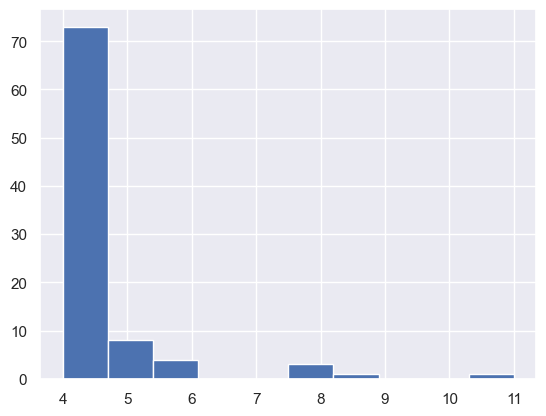

In [1674]:
real_estate_df['ceiling_height'].hist(range=(4, 11))

По гистограмме видно, что в датасете есть квартиры с высотой 6, 8, 9 метров. Так как максимальная высота потолков не установлена - такое может быть. Например, двухэтажная квартира. Поэтому все, что выше 10 метров - поделим на 10. Также заменим значения потолков на медианное у квартир с потолками ниже 2.5 метров

In [1675]:
def change_ceiling_height(height):
    if height > 10:
        height /= 10
    elif height < 2.5:
        height = 2.65 
    return height



real_estate_df['ceiling_height'] = real_estate_df['ceiling_height'].apply(change_ceiling_height)


In [1676]:
real_estate_df['ceiling_height'].describe()

count    23613.000000
mean         2.698978
std          0.236610
min          1.030000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Изменим столбец `balcony`. Логично предположить, что пропуски в этом столбце означают отсутсвие балкона. Заменим пропуски на 0

In [1677]:
real_estate_df['balcony'] = real_estate_df['balcony'].fillna(0)

In [1678]:
real_estate_df.isna().sum().sort_values()

total_images                0
balcony                     0
open_plan                   0
floor                       0
floors_total                0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height              0
locality_name              48
living_area              1870
kitchen_area             2231
days_exposition          3172
parks_around_3000        5508
ponds_around_3000        5508
city_centers_nearest     5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
is_apartment            20838
dtype: int64

In [1679]:
real_estate_df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучим столбцы `is_apartment`. Скорее всего пользователь не указал, что это апартаменты, потому что это не апартаменты. Заменим все значения на False. 

In [1680]:
real_estate_df['is_apartment'] = real_estate_df['is_apartment'].fillna(False)

In [1681]:
real_estate_df.isna().sum().sort_values()

total_images                0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
floors_total                0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height              0
locality_name              48
living_area              1870
kitchen_area             2231
days_exposition          3172
parks_around_3000        5508
ponds_around_3000        5508
city_centers_nearest     5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
dtype: int64

Избавились от пропусков в столбце `is_apartment`. Это хорошо, в столбце `living_area` много пропусков. Заменим пропуски на медианное значение площади по количеству комнат. 

In [1682]:
for room in real_estate_df['rooms'].unique():
    real_estate_df.loc[(real_estate_df['rooms'] == room) & 
                       (real_estate_df['living_area'].isna()), 'living_area'
                       ] = real_estate_df.loc[(real_estate_df['rooms'] == room), 'living_area'].median()

In [1683]:
real_estate_df['living_area'].isna().sum()

0

Заменим пропуски `kitchen_area` более простым способом, везде поставим медианное значение. Так как площадь кухни имеет более меньший вес чем жилая площадь. 

In [1684]:
real_estate_df['kitchen_area'] = real_estate_df['kitchen_area'].fillna(real_estate_df['kitchen_area'].median())

In [1685]:
real_estate_df['kitchen_area'].isna().sum()

0

In [1686]:
real_estate_df.isna().sum().sort_values()

total_images                0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
living_area                 0
studio                      0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
locality_name              48
days_exposition          3172
parks_around_3000        5508
ponds_around_3000        5508
city_centers_nearest     5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
dtype: int64

In [1687]:
real_estate_df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.00,9,False,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.50,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим на столбец `locality_name`. Перед тем, как анализировать пропуски - посмотрим, есть ли неявные дубликаты. 

In [1688]:
print(f'Количество уникальных значений столбца: {len(real_estate_df.locality_name.unique())}')


Количество уникальных значений столбца: 365


Приведем все названия локаций к нижнему регистру. Возможно причина в неявных дубликатах в этом. Но даже если нет - единый стиль заполнения лучше смотрится. 

In [1689]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.lower() 

In [1690]:
(real_estate_df.locality_name.unique())[:30]

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов'], dtype=object)

Одна из распространенных причин появления дубликатов - буква е и буква ё. Для удобства заменим букву `ё` на `е`. 

In [1691]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.replace('ё', 'е')
print(f'Количество уникальных значений столбца: {len(real_estate_df.locality_name.unique())}')

Количество уникальных значений столбца: 331


Букву ё убрали. При осмотрении уникальных значений остальных неявных дублей не было замечено. Теперь можно посмотреть на пропуски. 

In [1692]:
real_estate_df['locality_name'].isna().sum()

48

Квартир без указания города мало, поэтому их можно смело удалить. Погоды не сделают, а мешать будут. 

In [1693]:
real_estate_df = real_estate_df.dropna(subset=['locality_name'])

In [1694]:
real_estate_df['locality_name'].isna().sum()

0

Таких квартир в датасете 49. Этими данными можно пренебречь и удалить. Удалим

In [1695]:
real_estate_df = real_estate_df.dropna(subset=['locality_name'])

Раз пошли по картографическим данным, продолжим их обрабатывать. Тем более очень много пропусков именно в этих данных. 

In [1696]:
real_estate_df.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3171
parks_around_3000        5500
ponds_around_3000        5500
city_centers_nearest     5501
airports_nearest         5524
ponds_nearest           14529
parks_nearest           15535
dtype: int64

In [1697]:
real_estate_df['parks_around_3000'].describe() #посмотрим минимальное значение в столбце

count    18065.000000
mean         0.611569
std          0.802088
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [1698]:
real_estate_df['ponds_around_3000'].describe() #минимальное значение в столбце

count    18065.000000
mean         0.769499
std          0.938669
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Разберемся с парками и прудами. 
- `parks_around_3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around_3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)

Из этих данных можно предположить, что если нет парков и прудов в радиусе `3` км, то и в шаговой доступности тоже нет парков. Поэтому можно заменить пропуски в столбцах `parks_nearest` и `ponds_nearest` на `0`, если в столбцах `parks_around_3000` и `ponds_around_3000` если значение равно 0. 

In [1699]:
real_estate_df['parks_nearest'].isna().sum()
real_estate_df['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23565, dtype: float64

In [1700]:
real_estate_df['ponds_nearest'].isna().sum()

14529

In [1701]:
def replace_to_zero(real_estate_df):
    real_estate_df.loc[
        (real_estate_df['parks_around_3000'] == 0) &
        (real_estate_df['ponds_around_3000'] == 0), 
        ['parks_nearest', 'ponds_nearest']
    ] = 0
    return real_estate_df

replace_to_zero(real_estate_df)
real_estate_df.head()
real_estate_df['parks_nearest']

0        482.0
1          0.0
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23565, dtype: float64

In [1702]:
real_estate_df['parks_nearest'].isna().sum() #избавились от 5806 дублей

9745

In [1703]:
real_estate_df['ponds_nearest'].isna().sum() #избавились от 5806 дублей

8739

Выведем процент пропусков

In [1704]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100

total_images             0.000000
locality_name            0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
living_area              0.000000
days_exposition         13.456397
parks_around_3000       23.339699
ponds_around_3000       23.339699
city_centers_nearest    23.343942
airports_nearest        23.441545
ponds_nearest           37.084659
parks_nearest           41.353703
dtype: float64

В столбцах `park_nearest`, `ponds_nearest` еще много пропусков. Проделаем те же действия, что и в предыдущем этапе, но вместо значений с 0 будем искать значения Nan. 

In [1705]:
def replace_to_zero_2(real_estate_df):
    real_estate_df.loc[
        (real_estate_df['parks_around_3000'].isna()) &
        (real_estate_df['ponds_around_3000'].isna()), 
        ['parks_nearest', 'ponds_nearest']
    ] = 0
    return real_estate_df

replace_to_zero_2(real_estate_df)
real_estate_df.head()
real_estate_df['parks_nearest']

0        482.0
1          0.0
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      0.0
23696      0.0
23697    173.0
23698      0.0
Name: parks_nearest, Length: 23565, dtype: float64

In [1706]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100

total_images             0.000000
locality_name            0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
living_area              0.000000
days_exposition         13.456397
ponds_nearest           13.744961
parks_nearest           18.014004
parks_around_3000       23.339699
ponds_around_3000       23.339699
city_centers_nearest    23.343942
airports_nearest        23.441545
dtype: float64

Остальные пропуски в расстояниях и количествах до прудов и парков заменим на медиану. 

In [1707]:
for field_name in ['parks_nearest','ponds_nearest','parks_around_3000', 'ponds_around_3000']:
    real_estate_df[field_name].fillna(real_estate_df[field_name].median(), inplace=True)



In [1708]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100

total_images             0.000000
ponds_around_3000        0.000000
parks_nearest            0.000000
parks_around_3000        0.000000
locality_name            0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
ponds_nearest            0.000000
studio                   0.000000
floor                    0.000000
living_area              0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
is_apartment             0.000000
days_exposition         13.456397
city_centers_nearest    23.343942
airports_nearest        23.441545
dtype: float64

Удалили практически все пропуски из наших данных. 
- В столбце `days_exposition` осталось 13% пропусков. Возможно, это еще активные объявления, поэтому заменять пропуски в этом месте не имеет смысла 
- В столбцах `city_centers_nearest` и `airports_nearest` практически одинаковый процент пропуска. Скорее всего, при попытке их заменить есть большая вероятность исказить данные. Так как расстояния до аэропорта и цента зачастую одни из решающих в выборе квартиры. Оставим так. 

Преобразуем типы данных 

In [1709]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Нет смысла хранить данные о цене, расстояниях количествах этажей, балконов, парковок, водоёмов, дней размещения в вещественном формате, разумнее использовать целочисленный. В вещественном формате в таблице указаны только площади, их тип заменять не будем. Особенность типа данных int - он не может хранить NaN, однако реализованный в pandas 1.0.0 тип Int - может. Но мы не будем приводить к нему. Не все методы работают с ним адекватно =(

Для некоторых целочисленных данных можно немного сократить количество используемой памяти. Так, количество фотографий, комнат, номера этажа очевидно поместятся в int16. Но на этом датасете выигрыш небольшой.

Поэтому столбцы с пропусками оставим типа float, просто округлим, чтобы отбросить хвосты и иметь возможность применять операцию сравнения с целыми числами и NaN. Столбцы без пропусков приведём к int там, где по смыслу целочисленные значения.

Проведём округления floors_total, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, days_exposition
Заменим тип total_images, rooms, floor, balcony на int16
Заменим тип last_price на int
Тип данных first_day_exposition заменим на datetime64 используя метод to_datetime()

In [1710]:
real_estate_df['first_day_exposition'] = pd.to_datetime(real_estate_df['first_day_exposition'])

for col in ['floors_total','balcony','airports_nearest',
            'city_centers_nearest','parks_nearest','ponds_nearest',
            'parks_around_3000','ponds_around_3000','days_exposition']:
    real_estate_df[col] = real_estate_df[col].round()
for col in ['total_images','rooms','floor']: 
    real_estate_df[col] = real_estate_df[col].round().astype('int16')
real_estate_df['last_price'] = real_estate_df['last_price'].round().astype('int')



In [1711]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int16         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int16         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int16         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [1712]:
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,False,False,9.1,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Удалим выбросы

In [1713]:
real_estate_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.698875,10.675875,34.324326,5.878124,10.423234,0.593677,28797.082701,14192.656056,0.468831,167.169998,0.823297,198.738129,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.236562,6.594823,21.721235,4.871485,5.631746,0.960660,12632.499735,8613.348153,0.748403,306.301628,0.827618,305.195521,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.030000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18565.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,0.000000,1.000000,0.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,301.000000,1.000000,389.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для обнаружения аномалий (выбросов) в каждом столбце, можно использовать статистические метрики, такие как среднее значение (mean), стандартное отклонение (std), минимальное значение (min), максимальное значение (max), а также квартили (25%, 50%, 75%).

Взглянув на предоставленные данные, можно заметить следующие потенциальные аномалии:

- В столбце "total_area": максимальное значение составляет 900 м², что кажется необычно для жилой недвижимости.

- В столбце "living_area_m2": максимальное значение составляет 409.7 м², что также кажется необычно.

- В столбце "kitchen_area_m2": максимальное значение составляет 112 м², что может быть аномально.

- В столбце "ceiling_height_m": максимальное значение составляет 100 м, что выглядит слишком высоким для типичных потолков в жилых помещениях.

- В столбце "floors_total":максимальное значение составляет 33 этажа, что может быть выбивающимся значением, если анализируются данные о квартирах.

- В столбце "rooms":  максимальное значение составляет 19 комнат, что может быть необычно для типичных жилых помещений.

- В столбце "last_price": максимальное значение составляет 763 млн, что кажется аномально высоким для большинства недвижимости.

 Построим ящик с усами и гистограмму для столбца total_area

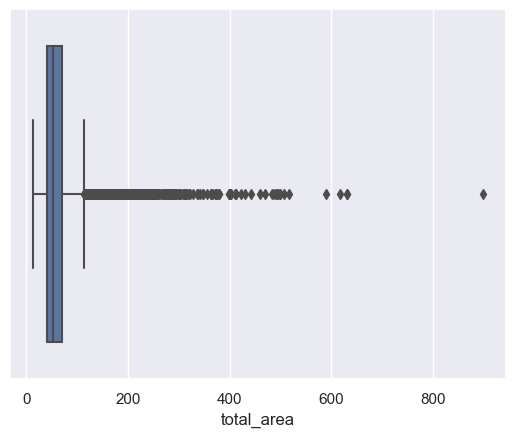

In [1714]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_area'])
plt.show()


По графику видим, что в усы входят только данные до 200 квадратных метров. А 900 квадратных метров очень похоже на выброс. 

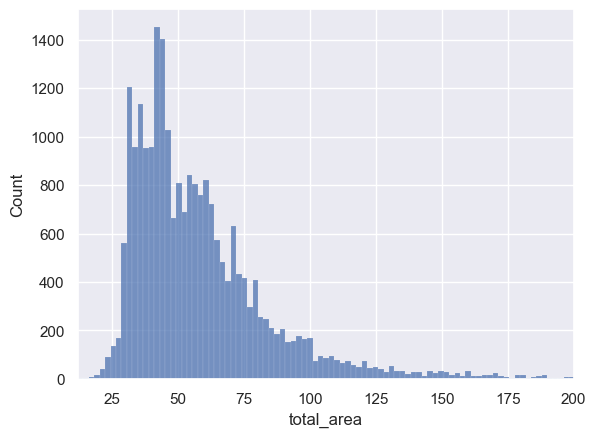

In [1715]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="total_area")
plt.xlim(12, 200)
plt.show()

In [1716]:
real_estate_df[real_estate_df['total_area']>200]['total_area'].count() / real_estate_df['total_area'].shape[0] * 100

0.9590494377254403

Так как данных с таким количеством квартир мало - их можно удалить

In [1717]:
real_estate_df = real_estate_df[real_estate_df['total_area'] <= 200]

Количество комнат

In [1718]:
real_estate_df['rooms'].describe()

count    23339.000000
mean         2.034577
std          0.995514
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

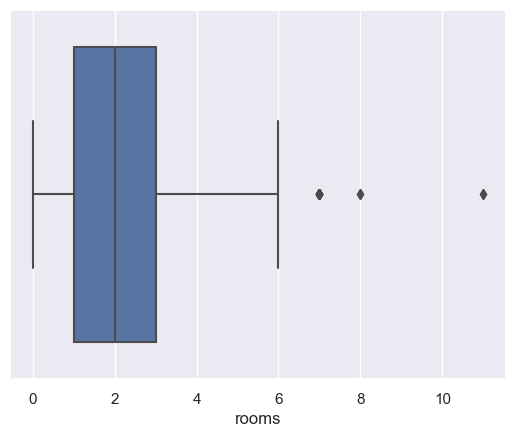

In [1719]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['rooms'])
plt.show()

Все, что выше 6 выбивается. Посмотрим на гистограмму

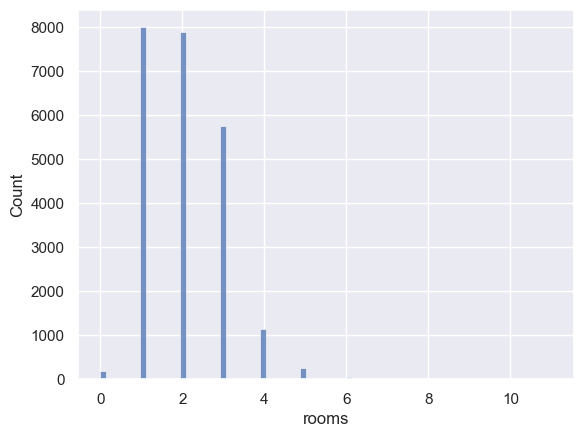

In [1720]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="rooms")
#plt.xlim(12, 200)
plt.show()

In [1721]:
real_estate_df[real_estate_df['rooms'] > 6]['rooms'].count() / real_estate_df.shape[0] * 100

0.10283216933030549

In [1722]:
real_estate_df[real_estate_df['rooms'] < 1]['rooms'].count() / real_estate_df.shape[0] * 100

0.82694202836454

Квартир с комнатами больше 6 и меньше 1 комнат очень мало. Их можно удалить из выборки

In [1723]:
real_estate_df = real_estate_df[(real_estate_df['rooms'] >= 1) & (real_estate_df['rooms'] <= 6)]

hhh

In [1724]:
real_estate_df['living_area'].describe()

count    23122.000000
mean        33.182882
std         17.031683
min          2.000000
25%         18.400000
50%         30.300000
75%         42.200000
max        164.700000
Name: living_area, dtype: float64

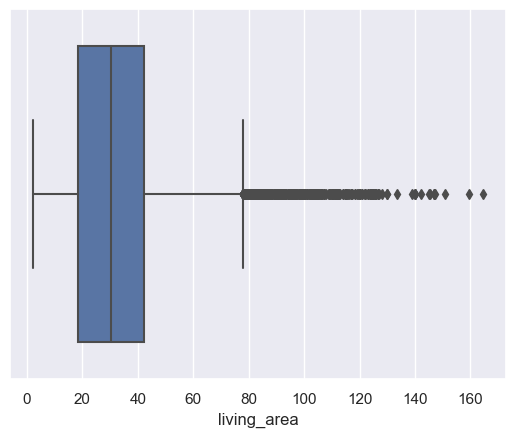

In [1725]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['living_area'])
plt.show()

Есть выбивающиеся значения больше 80. Посмотрим, как будет выглядеть отфильтрованная гистограмма

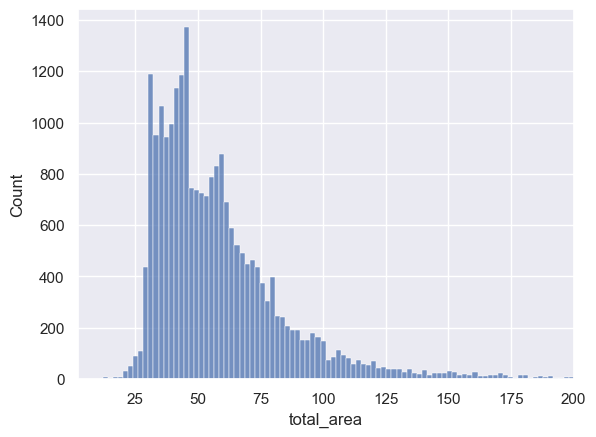

In [1726]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="total_area")
plt.xlim(2, 200)
plt.show()

Посчитаем количество

In [1730]:
real_estate_df[(real_estate_df['living_area']<18) |
               (real_estate_df['living_area']>150)]['total_area'].count()/ real_estate_df['total_area'].shape[0] * 100

0.0

In [1728]:
for room in real_estate_df['rooms'].unique():
    print(room, real_estate_df.loc[(real_estate_df['rooms'] == room), 'living_area'].median())

3 45.0
1 17.6
2 30.5
4 63.5
5 89.95
6 107.0


Тут уже много выбивающихся значений. Их удаление может привести к тому, что мы потеряем важные данные для дальнейшего анализа. Лучше заменить на медианное значение. 

In [1729]:
for room in real_estate_df['rooms'].unique():
    median = max(real_estate_df.loc[(real_estate_df['rooms'] == room), 'living_area'].median(), 18)
    real_estate_df.loc[(real_estate_df['rooms'] == room) & 
                       ((real_estate_df['living_area'] < 18) | (real_estate_df['living_area'] > 150)), 'living_area'
                       ] = median

Разберемся со столбцом kitchen_area

In [1731]:
real_estate_df['kitchen_area'].describe()

count    23122.000000
mean        10.262573
std          5.137185
min          1.300000
25%          7.200000
50%          9.100000
75%         11.300000
max         93.200000
Name: kitchen_area, dtype: float64

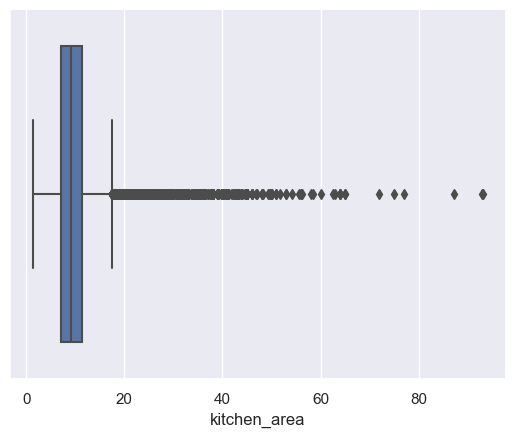

In [1732]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['kitchen_area'])
plt.show()

После 20 и до 4 много выпадающих значений. Посмотрим какое количество кухонь имеет значение больше 20. И какая гистограмма будет без выпадающиз значений. 

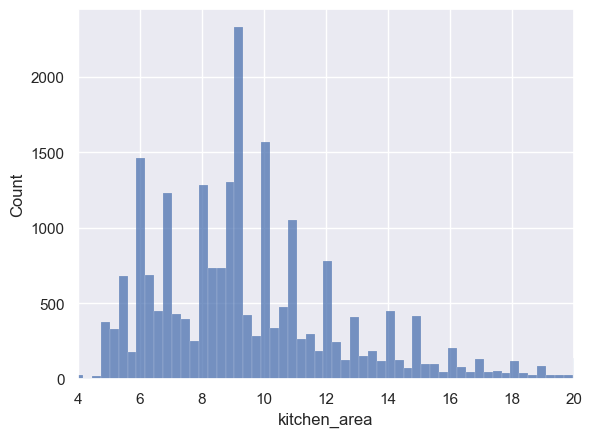

In [1736]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="kitchen_area")
plt.xlim(4, 20)
plt.show()

In [1740]:
real_estate_df[
    (real_estate_df['kitchen_area'] > 20) | 
    (real_estate_df['kitchen_area'] < 5)
]['kitchen_area'].count() / real_estate_df['kitchen_area'].shape[0] * 100

0.0

4 процента это не очень много. Можно удалить

In [1739]:
real_estate_df = real_estate_df[
    (real_estate_df['kitchen_area'] > 5) &
    (real_estate_df['kitchen_area'] < 20)
]

Посмотрим floors_total

In [1742]:
real_estate_df['floors_total'].describe()

count    21663.000000
mean        10.765406
std          6.570090
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

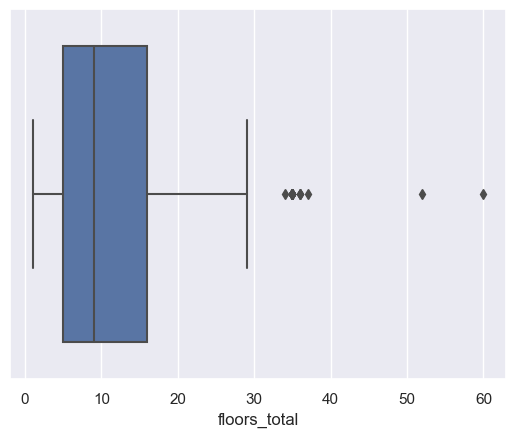

In [1743]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['floors_total'])
plt.show()

Посмотрим, сколько домов с этажом меньше 1 и больше 30

In [1748]:
real_estate_df[
    (real_estate_df['floors_total'] < 2) |
    (real_estate_df['floors_total'] >30)
]['floors_total'].count() / real_estate_df['floors_total'].shape[0] * 100

0.0

Можно удалять

In [1750]:
real_estate_df = real_estate_df[
    (real_estate_df['floors_total'] >= 2) &
    (real_estate_df['floors_total'] < 25)
]

Посмотрим на гистограмму

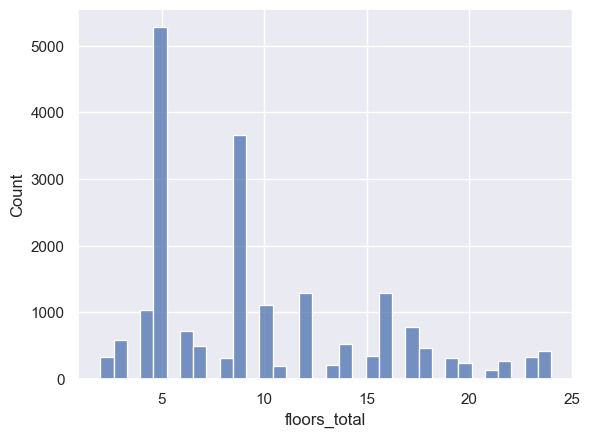

In [1751]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="floors_total")
#plt.xlim(4, 20)
plt.show()

Гистограмма не равномерная, но это нормально. Так как больше всего 5 и 9 этажок

Посмотрим на last_price

In [1752]:
real_estate_df['last_price'].describe()

count    2.032500e+04
mean     5.586090e+06
std      4.485086e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.190000e+08
Name: last_price, dtype: float64

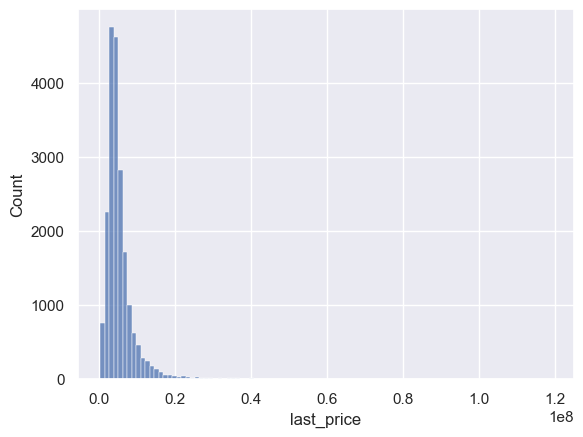

In [1772]:
sns.set(style="darkgrid")
sns.histplot(data=real_estate_df, x="last_price", bins=100)
plt.show()

Посмотрим на количество квартир, которые стоят больше 20 миллионов

In [1778]:
real_estate_df[
    real_estate_df['last_price'] > 15_000_000
]['last_price'].count() / real_estate_df['last_price'].shape[0] * 100

0.0

Можно удалить

In [1777]:
real_estate_df = real_estate_df[real_estate_df['last_price'] < 15_000_000]

Посмотрим на total_images

In [1790]:
real_estate_df['total_images'].describe()

count    19723.000000
mean         9.769051
std          5.561856
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

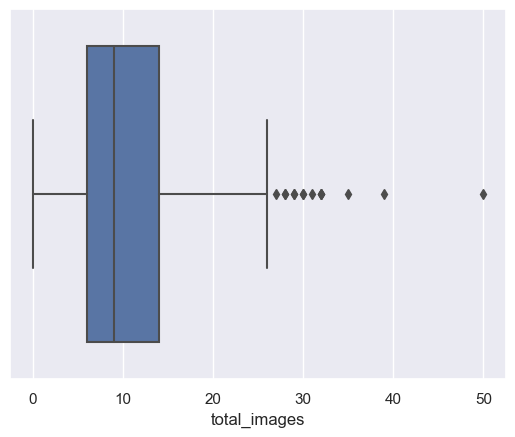

In [1780]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_images'])
plt.show()

Посмотрим на количесво меньше 5 фотографий и больше 25

In [1794]:
real_estate_df[
    (real_estate_df['total_images'] < 2)
    | (real_estate_df['total_images'] > 25)
]['total_images'].count() / real_estate_df['total_images'].shape[0] * 100

0.0

8% это все же много, чтобы удалять данные. Чем больше данные тем большее количество входит в этот процент. Заменим на медиану

In [1793]:
real_estate_df['total_images'] = real_estate_df['total_images'].apply(
    lambda mean: mean if 3 <= mean <= 24 else real_estate_df['total_images'].median())

Еще раз выведем всю статистику

In [1795]:
real_estate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,19723.0,1.063079e+01,4.595356e+00,3.00,7.00,9.00,14.00,24.00
last_price,19723.0,5.039061e+06,2.569837e+06,430000.00,3350000.00,4498000.00,6150000.00,14999999.00
total_area,19723.0,5.472425e+01,2.041702e+01,12.00,40.00,50.20,65.00,200.00
rooms,19723.0,1.999442e+00,9.273092e-01,1.00,1.00,2.00,3.00,6.00
ceiling_height,19723.0,2.679114e+00,2.073906e-01,1.03,2.60,2.65,2.70,8.30
floors_total,19723.0,9.826700e+00,5.536933e+00,2.00,5.00,9.00,14.00,24.00
living_area,19723.0,3.210336e+01,1.417610e+01,18.00,18.30,30.00,41.00,140.00
floor,19723.0,5.414896e+00,4.244229e+00,1.00,2.00,4.00,7.00,24.00
kitchen_area,19723.0,9.331500e+00,2.835000e+00,5.04,7.00,9.00,10.80,19.94
balcony,19723.0,5.828728e-01,9.416959e-01,0.00,0.00,0.00,1.00,5.00


Все супер! Можно идти дальше 

### Посчитайте и добавьте в таблицу новые столбцы

### Проведите исследовательский анализ данных

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод